# List 1 Computational Physics

First we will import the necessary libraries for this lesson

In [824]:
import numpy as np
from cmath import exp, pi
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.ticker import ScalarFormatter

## Problem 1 - Calculate the Discret Fourier Transform DFT

For this lecture, we will use some functions (dft and idft) from a external archive dcst.py

In [1191]:
import dcst

### **Alternative a)** First we will calculate our first function

In [1194]:
def square(point, L):
    if (point <= L/2):
        return 2
    else:
        return -2

In [1196]:
a = 0
L = 10
N = 1000
h = (L-a)/N

tpoints = arange(a, L, h)
y = []

for k in tpoints:
    y.append(square(k, L))

cka = dcst.dct(y)

Our square function and its coefficient amplitudes looks like this

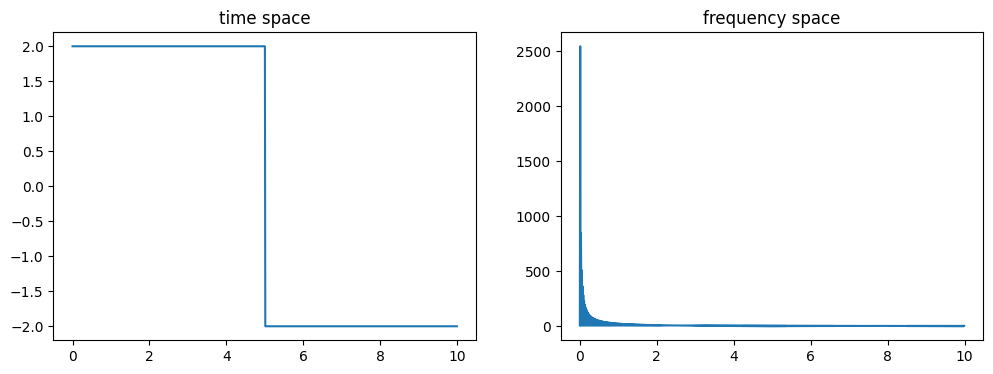

In [1199]:
fig, axsa = subplots(1, 2, figsize=(12, 4))

axsa[0].plot(tpoints, y)
axsa[0].set_title('time space')

axsa[1].plot(tpoints, abs(cka))
axsa[1].set_title('frequency space')

plt.show()

### **Alternative b)** Now for the next function we have

In [1202]:
def sinsin10(point, L, N):
    return sin(pi*point/N)*sin(10*pi*point/N)

In [1204]:
a2, b2 = 0, 1000
N2 = 1000
h2 = (b2-a2)/N2

t2points = arange(a, b2, h2)
y2 = []

for k in t2points:
    y2.append(sinsin10(k, b2, N2))

ckb = dcst.dct(y2)

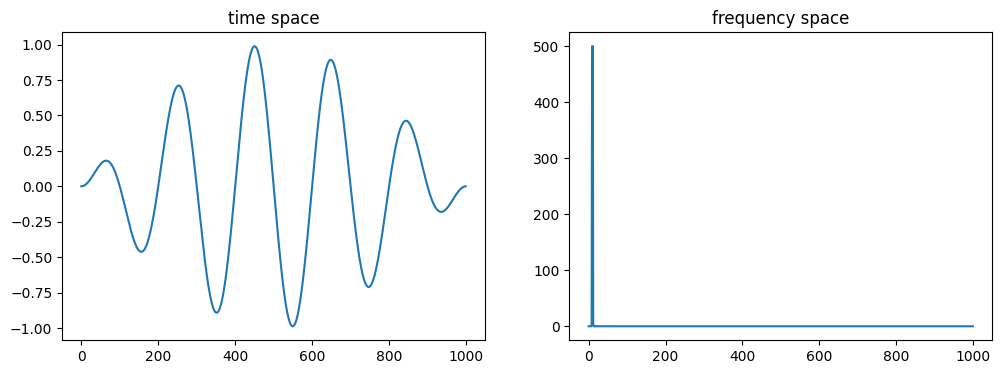

In [1206]:
fig, axsb = subplots(1, 2, figsize=(12, 4))

axsb[0].plot(t2points, y2)
axsb[0].set_title('time space')

axsb[1].plot(t2points, abs(ckb))
axsb[1].set_title('frequency space')

plt.show()

## Problem 2 - Detecting the periodicity of a signal

### **Alternative a)** We will estimate of the cycle length of the flutuations in months

In [1210]:
arr = loadtxt('sunspots.txt', delimiter='\t')
arr = arr.T

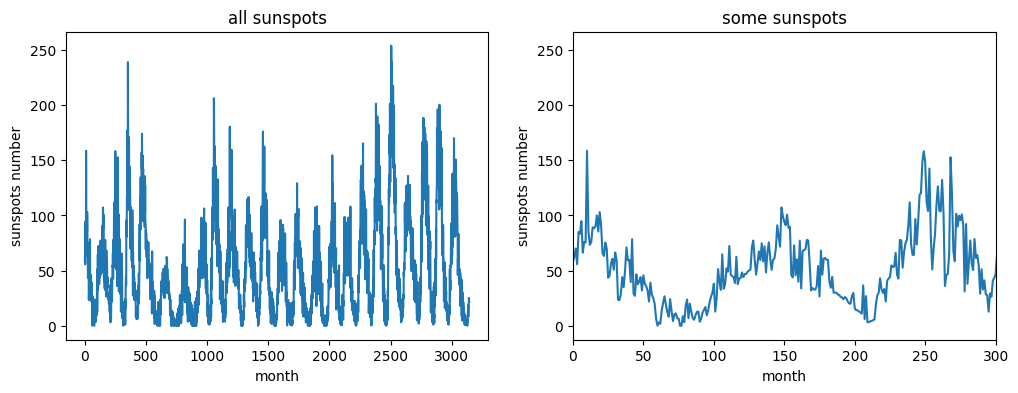

In [1212]:
month, fluct = arr[0], arr[1]

fig, axs = subplots(1, 2, figsize=(12, 4))

axs[0].plot(month, fluct)
axs[0].set_title('all sunspots')
axs[0].set_xlabel('month')
axs[0].set_ylabel('sunspots number')

axs[1].plot(month, fluct)
axs[1].set_title('some sunspots')
axs[1].set_xlim(0, 300)
axs[1].set_xlabel('month')
axs[1].set_ylabel('sunspots number')

plt.show()

we can see in the second image that we have approximately 2.5 fluctuations in 300 months, this mean that

In [1215]:
lengh_cycle = 300/2.5
lengh_cycle

120.0

### **Alternative b)** Fourier transform for this sunspots

In [1218]:
cks = dcst.dct(fluct)

In [1220]:
cks2 = cks.copy()

for i in range(len(cks2)):
    if i==0:
        cks2[i] = 0
    else:
        cks2[i] = abs(cks2[i])**2

In [1222]:
month_range = len(month)
month_range

3143

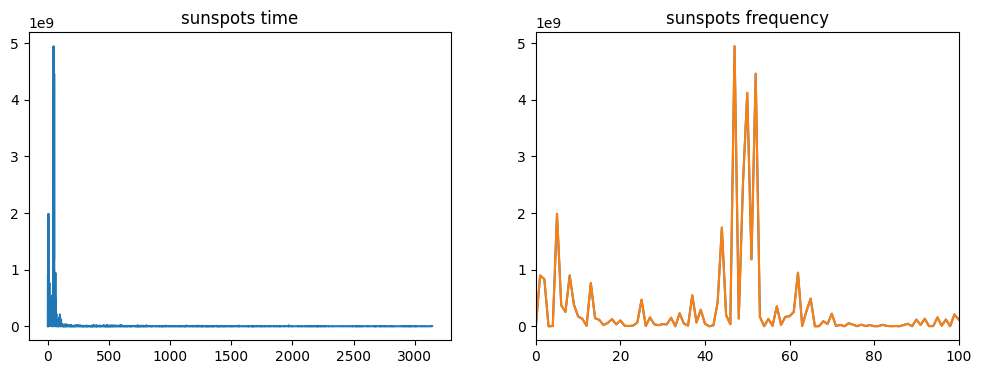

In [1224]:
fig, axsb = subplots(1, 2, figsize=(12, 4))

axsb[0].plot(cks2)
axsb[0].set_title('sunspots time')

axsb[1].plot(cks2)
axsb[1].set_title('sunspots frequency')
axsb[1].set_xlim(0, 100)

plt.plot(cks2)
plt.show()

### **Alternative c)** Find the frequency and its respective period

seeing the figure, we note that the max value is approximately between 0 and 100 month

(dont take in account the final result because the coefficients are mirrored), so we need find the max value in this interval 

In [1229]:
max_value = 0
month_max_value = 0

for i in range(100):
    if cks2[i] > max_value:
        max_value = cks2[i]
        month_max_value = i

now we find the maximum frequence and its respective month

In [1232]:
print(f'max value = {real(max_value):.2e} and its respective month = {month_max_value}')

max value = 4.94e+09 and its respective month = 47


we can calculate the frequency in Hz, using the transform units from month to second multiplying by "24 x 30 x 3600"

In [1235]:
freq = month_max_value/ (len(month)*24*30*3600)
print(f'maximum frequence = {freq:.2e} Hz')

maximum frequence = 5.77e-09 Hz


In [1237]:
p = len(month)/month_max_value
print(f'period = {p:.4f} day')

period = 66.8723 day


## Problem 3 - Fourier Transform of the musical instruments

### **Alternative a)** learn arquive and calculate the dft 

In [1241]:
piano = loadtxt('piano.txt')
trumpet = loadtxt('trumpet.txt')

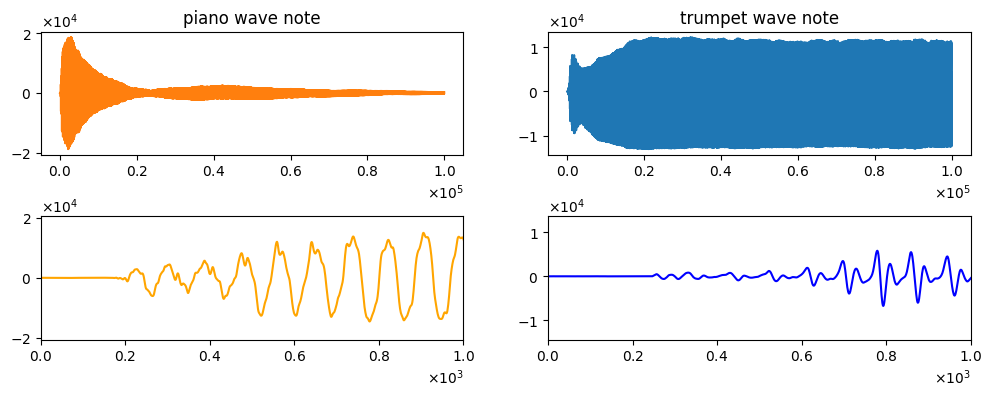

In [1243]:
fig, axs = subplots(2, 2, figsize = (12, 4))

for i in range(2):
    for j in range(2):
        axs[i, j].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Eixo x
        axs[i, j].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Eixo y
        axs[i, j].ticklabel_format(style='sci', axis='both', scilimits=(0, 0))

axs[0, 0].plot(piano, c='tab:orange')
axs[0, 0].set_title('piano wave note')

axs[1, 0].plot(piano, c='orange')
axs[1, 0].set_xlim(0, 1000)

axs[0, 1].plot(trumpet)
axs[0, 1].set_title('trumpet wave note')

axs[1, 1].plot(trumpet, c='blue')
axs[1, 1].set_xlim(0, 1000)

plt.subplots_adjust(hspace=0.5)  # Espaçamento vertical aumentado
plt.show()

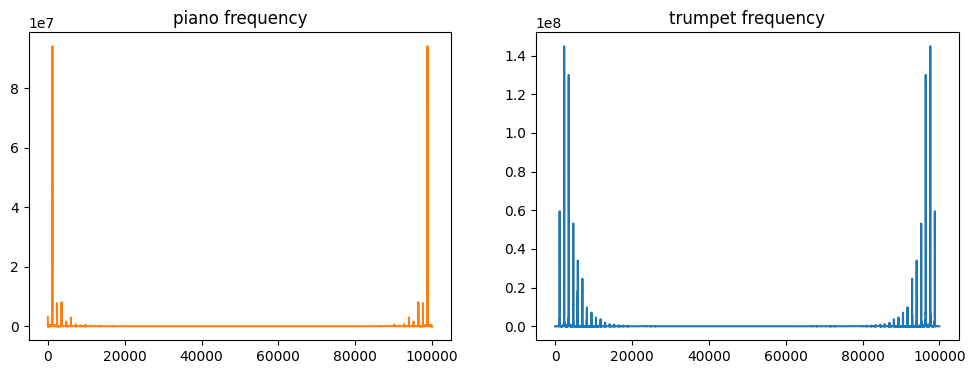

In [1245]:
ck_pian = abs(fft(piano))
ck_trp = abs(fft(trumpet))

fig, axs3 = subplots(1, 2, figsize=(12, 4))

axs3[0].plot(ck_pian, c='tab:orange')
axs3[0].set_title('piano frequency')

axs3[1].plot(ck_trp)
axs3[1].set_title('trumpet frequency')

plt.show()

### **Alternative b)** calculate the note used by this musical instruments

$$ \frac{44100 \hspace{0.3cm} notes}{1 \hspace{0.3cm} sec} = \frac{100000 \hspace{0.3cm}}{x \hspace{0.3cm} sec}$$

$$ x = \frac{100000}{44100} = 2,26757 \hspace{0.5cm} \text{notes per second}$$

Now we will find the maximum k for each instrument

In [1250]:
max_pian = 0
max_trump = 0
L = 10000

for i in range(len(ck_pian)):
    if i==0:
        ck_pian[i] = 0
    else:
        ck_pian[i] = abs(ck_pian[i])**2

for i in range(len(ck_trp)):
    if i==0:
        ck_trp[i] = 0
    else:
        ck_trp[i] = abs(ck_trp[i])**2

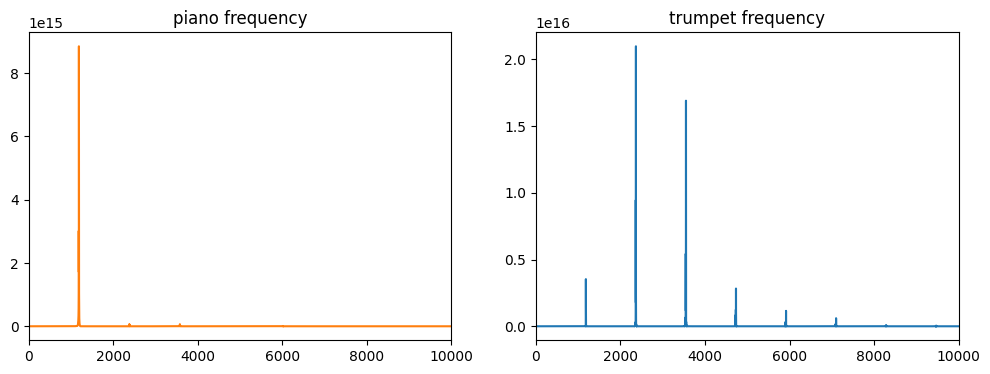

In [1252]:
fig, axs3 = subplots(1, 2, figsize=(12, 4))

axs3[0].plot(ck_pian, c='tab:orange')
axs3[0].set_title('piano frequency')
axs3[0].set_xlim(0, 10000)

axs3[1].plot(ck_trp)
axs3[1].set_title('trumpet frequency')
axs3[1].set_xlim(0, 10000)

plt.show()

So we can calculate the maximun k

In [943]:
for i in range(L):
    if pian[i] > max_pian:
        max_pian = pian[i]
        idx_max_pian = i

for j in range(L):
    if trump[j] > max_trump:
        max_trump = trump[j]
        idx_max_trump = j

so we can calculate the frequencies for both instruments, using **notes per second** that we found before

In [980]:
nps = 100000/44100

freq_pian = idx_max_pian/ nps
freq_trp = idx_max_trump/nps

In [984]:
print(f'freq_pian = {real(freq_pian)} Hz    and    freq_trp = {freq_trp} Hz')

freq_pian = 524.79 Hz    and    freq_trp = 1043.847 Hz


## Problem 4 - Fourier filtering and smoothing

**Alternative a) and b)** first we read and plot the graphics of the data and its coefficients 

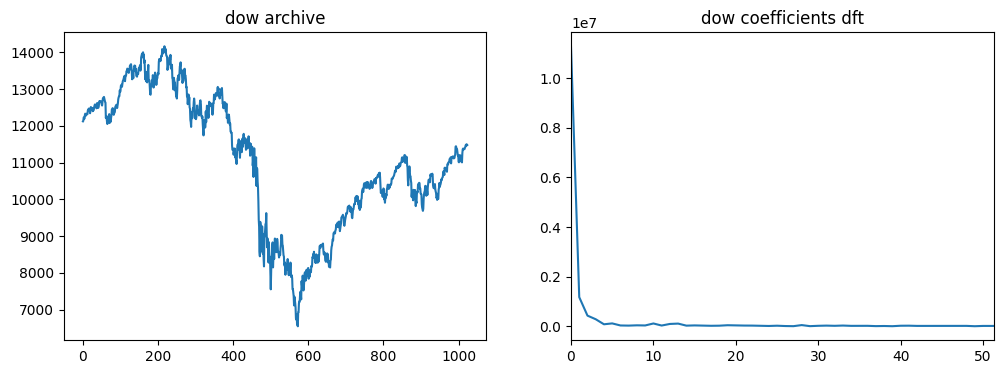

In [1019]:
dow = loadtxt('dow.txt')

ck4 = rfft(dow)

fig, axs = subplots(1, 2, figsize=(12, 4))

axs[0].plot(dow)
axs[0].set_title('dow archive')

axs[1].plot(abs(ck4))
axs[1].set_title('dow coefficients dft')
axs[1].set_xlim(0, len(ck4)/10)

plt.show()

**Alternative c) and d)** now we configurate the zeros after 10% and plot our dft

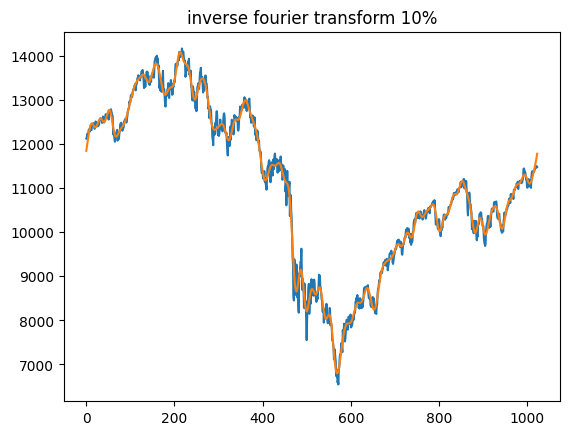

In [1024]:
for i in range(len(ck4)):
    if i > len(ck4)/10:
        ck4[i] = 0

yk4 = irfft(ck4)

plt.plot(dow)
plt.plot(yk4)
plt.title('inverse fourier transform 10%')

plt.show()

If we dont configurate the 0 coefficients, so our ifft would  be equal to our function dow, i mean, the orange curve would  be on top of the blue curve

this happens because we are taking values of our data and equaling to zero, so the 
accuracy is decreased

you can test this simply commenting the "for i in range(len(ck4))" is the previously block code

**Alternative e)** Now we will configurate only the 2% values for dow to see what happens

In [1026]:
ck4_2 = rfft(dow)

for j in range(len(ck4_2)):
    if j > (2/100)*len(ck4_2):
        ck4_2[j] = 0

yk4_2 = irfft(ck4_2)

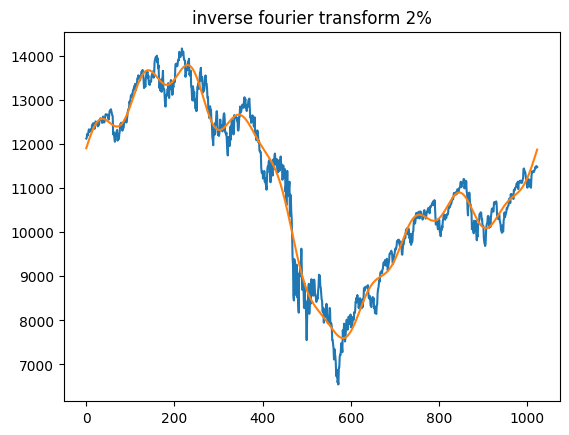

In [870]:
plt.plot(dow)
plt.plot(yk4_2)
plt.title('inverse fourier transform 2%')

plt.show()

## Problem 5 - Function smoothing

Create a program and use the DFT, adjusting some coefficients to see what happens

In [872]:
def func_5(array):
    
    y = []
    for t in array:
        if floor(2*t)%2 == 0:
            y.append(1)
        else:
            y.append(-1)
    return y

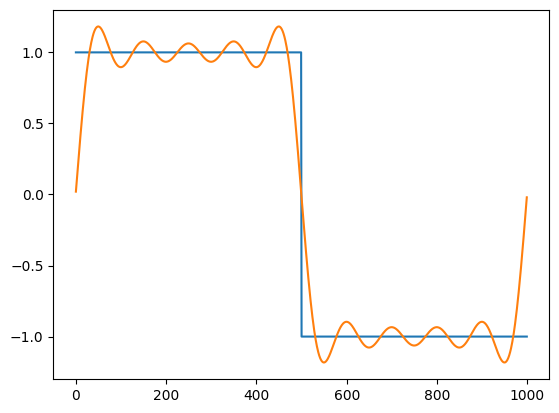

In [873]:
N = 1000
arr = arange(0, 1, 1/N)

df = np.array(func_5(arr))
ck5 = rfft(df)

for i in range(len(ck5)):
    if i > 10:
        ck5[i] = 0

yk5 = irfft(ck5)

plt.plot(df)
plt.plot(yk5)
plt.show()

we note that we have bad approximation for our square function, this happens because we dont use all coefficients that we can

so if we increase the coefficients number, we will see a best approximation

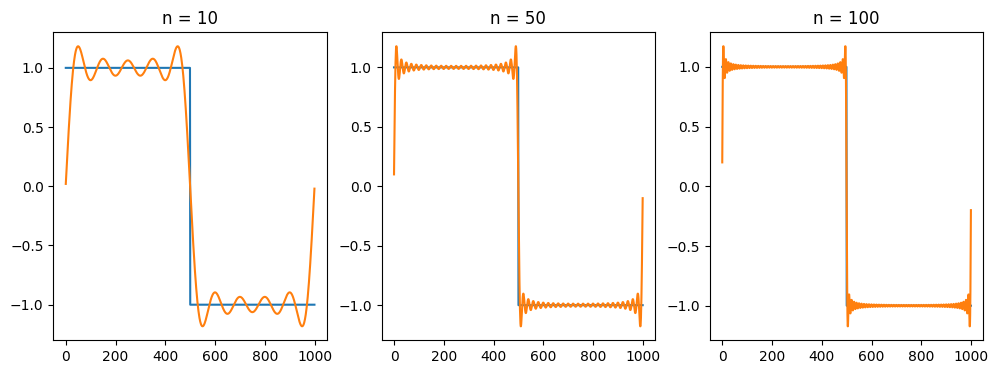

In [876]:
N = 1000
arr = arange(0, 1, 1/N)

df = np.array(func_5(arr))
ck5_org = rfft(df)

ck5 = copy(ck5_org)

ns = array([10, 50, 100])

fig, axs5 = subplots(1, len(ns), figsize=(4*len(ns), 4))

for n in range(len(ns)):
    for i in range(len(ck5)):
        if i > ns[n]:
            ck5[i] = 0

    yk5 = irfft(ck5)

    axs5[n].plot(df)
    axs5[n].plot(yk5)
    axs5[n].set_title(f'n = {ns[n]}')

    ck5 = copy(ck5_org)

plt.show()

## Problem 6 - Comparison between DFT and DCT

**Alternative a)** Plot the dow2 graphic and smoothing the data

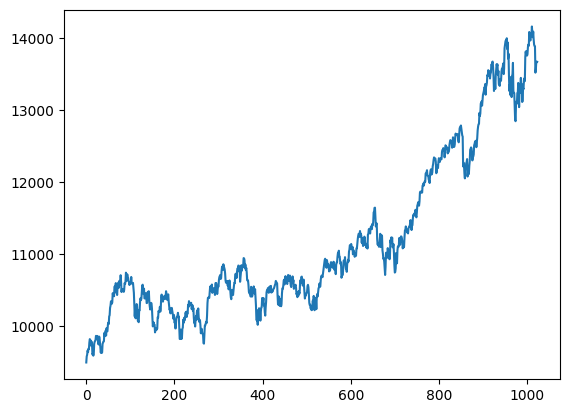

In [878]:
dow2 = loadtxt('dow2.txt')
plt.plot(dow2)

now we will calculate the DFT and adjust some coefficients to 0 

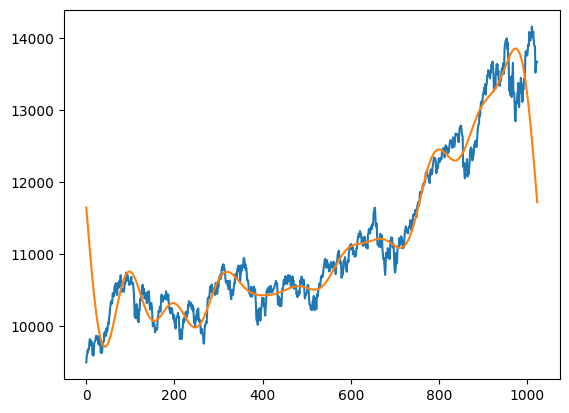

In [879]:
ck6 = rfft(dow2)

for j in range(len(ck6)):
    if j > (2/100)*len(ck6):
        ck6[j] = 0

yk6 = irfft(ck6)

plt.plot(dow2)
plt.plot(yk6)
plt.show()

**Alternative b)** We can see in the before image that our estimation is wrong near the initial and final limits

this happens because our dow2 function is not periodic (the initial and final data are different)

so now we need to use the cossin transform

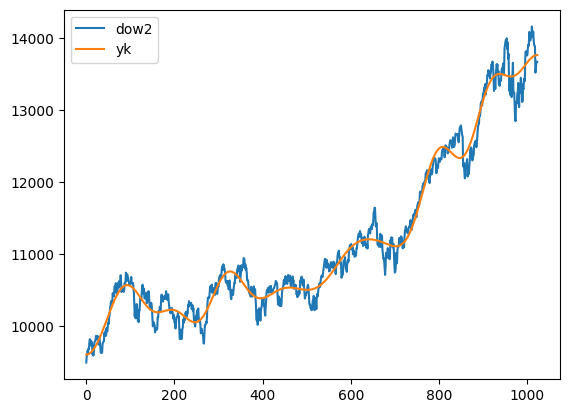

In [1175]:
from dcst import dct, idct

ck_cos = dct(dow2)

for i in range(len(ck_cos)):
    if i > (2/100)*len(ck_cos):
        ck_cos[i] = 0

yk_cos = idct(ck_cos)

plt.plot(dow2, label='dow2')
plt.plot(yk_cos, label='yk')
plt.legend()
plt.show()